In [1]:
import owlready2 as owlr
import pandas as pd
from rdflib import URIRef, Literal, Graph
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from collections import Counter
import uuid

from datetime import datetime, timezone

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

import loader

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

import networkx as nx


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FirstName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FamilyName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfBirth", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfDeath", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 1", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 2", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 3", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Postal Code", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Product", 
             "Attribute" : "Coverage Type", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Policy ID", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Start Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "End Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Context" : "Policy Types"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Context" : "All Types",
             "SubContext" : "Policy Types"},
             
            ]

pd.DataFrame(data_rows)

,Business Domain,Model,ModelType,Entity,Attribute,DataType,Context,SubContext
0,Core,Principal Interactions,Conceptual,Person,PersonID,string,NaN,NaN
1,Core,Principal Interactions,Conceptual,Person,FirstName,string,NaN,NaN
2,Core,Principal Interactions,Conceptual,Person,FamilyName,string,NaN,NaN
3,Core,Principal Interactions,Conceptual,Person,DateOfBirth,date,NaN,NaN
4,Core,Principal Interactions,Conceptual,Person,DateOfDeath,date,NaN,NaN
5,Core,Principal Interactions,Conceptual,Address,Address Line 1,string,NaN,NaN
6,Core,Principal Interactions,Conceptual,Address,Address Line 2,string,NaN,NaN
7,Core,Principal Interactions,Conceptual,Address,Address Line 3,string,NaN,NaN
8,Core,Principal Interactions,Conceptual,Address,Postal Code,string,NaN,NaN
9,Core,Principal Interactions,Conceptual,Address,Country,string,NaN,NaN


In [3]:
onto = owlr.get_ontology("datamodels_rdf.owl").load()

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#MemberOf belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromAttribute belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromClass belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.Relationsh

In [4]:
def flush(onto):
    for m in onto.Serialization.instances()[0].Contains:
        print(m, m.is_a)
flush(onto)
owlr.sync_reasoner(onto)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpwgesevfh


datamodels_rdf.Mapping_Attribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsSubContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelDomain [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelHasModelType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_SubContext [datamodels_rdf.Mapping]


* Owlready2 * HermiT took 0.6581871509552002 seconds
* Owlready * Reparenting datamodels_rdf.FactPredicate: {datamodels_rdf.Contains, owl.ObjectProperty} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactObject: {datamodels_rdf.Contains, owl.ObjectProperty} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactSubject: {datamodels_rdf.Contains, owl.ObjectProperty} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.ToClass: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage, datamodels_rdf.MetaClass}
* Owlready * Reparenting datamodels_rdf.ToAttribute: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage, datamodels_rdf.MetaClass}
* Owlready * Reparenting datamodels_rdf.FromOptionality: {datamodels_rdf.RelationshipLinkage, owl.ObjectProperty} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromClass: {datamode

In [5]:
loader.get_schema_labels(onto.EntityAttributeRecord, onto)

['Attribute',
 'Class',
 'Context',
 'Model',
 'ModelDomain',
 'SubContext',
 'DataType',
 'ModelType']

In [6]:
list(data_rows[0].keys())

['Business Domain', 'Model', 'ModelType', 'Entity', 'Attribute', 'DataType']

In [7]:
serial_key = { "Business Domain" : "ModelDomain", 
             "Model" : "Model", 
             "ModelType" : "ModelType", 
             "Entity" : "Class", 
             "Attribute" : "Attribute", 
             "DataType" : "DataType", 
             "Context" : "Context", 
             "SubContext" : "SubContext"}



In [8]:
serial_choice = onto.EntityAttributeRecord
entities = loader.get_contents_matching_subclass(serial_choice, onto.EntityMapping)
data_properties = loader.get_contents_matching_subclass(serial_choice, onto.DataPropertyMapping)
properties = loader.get_contents_matching_subclass(serial_choice, onto.PropertyMapping)

loader.get_contents_matching_subclass(onto.EntityAttributeRecord, onto.Mapping)


[datamodels_rdf.Mapping_Attribute,
 datamodels_rdf.Mapping_AttributeHasDataType,
 datamodels_rdf.Mapping_Class,
 datamodels_rdf.Mapping_ClassContainsAttribute,
 datamodels_rdf.Mapping_Context,
 datamodels_rdf.Mapping_ContextContainsClass,
 datamodels_rdf.Mapping_ContextContainsSubContext,
 datamodels_rdf.Mapping_DomainContainsModel,
 datamodels_rdf.Mapping_Model,
 datamodels_rdf.Mapping_ModelContainsClass,
 datamodels_rdf.Mapping_ModelContainsContext,
 datamodels_rdf.Mapping_ModelDomain,
 datamodels_rdf.Mapping_ModelHasModelType,
 datamodels_rdf.Mapping_SubContext]

In [9]:
lineage_tree = {e.SerializationLabel.first():e.SerializationParentLabel.first() for e in entities}

loader.get_lineage(lineage_tree,'SubContext')


['SubContext', 'Model', 'ModelDomain']

In [10]:
job_g = Graph()
job_g.parse ("datamodels_rdf.owl", format='xml')
dmns = Namespace(onto.base_iri)
job_g.bind('dm', dmns, override=True, replace=True)
job_g.bind('rdfs', RDFS)
namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}

batch_manifest = { onto.EntityAttributeRecord : data_rows}
test = loader.load_data(onto, batch_manifest=batch_manifest, rdflib_graph=job_g, serial_key=serial_key)



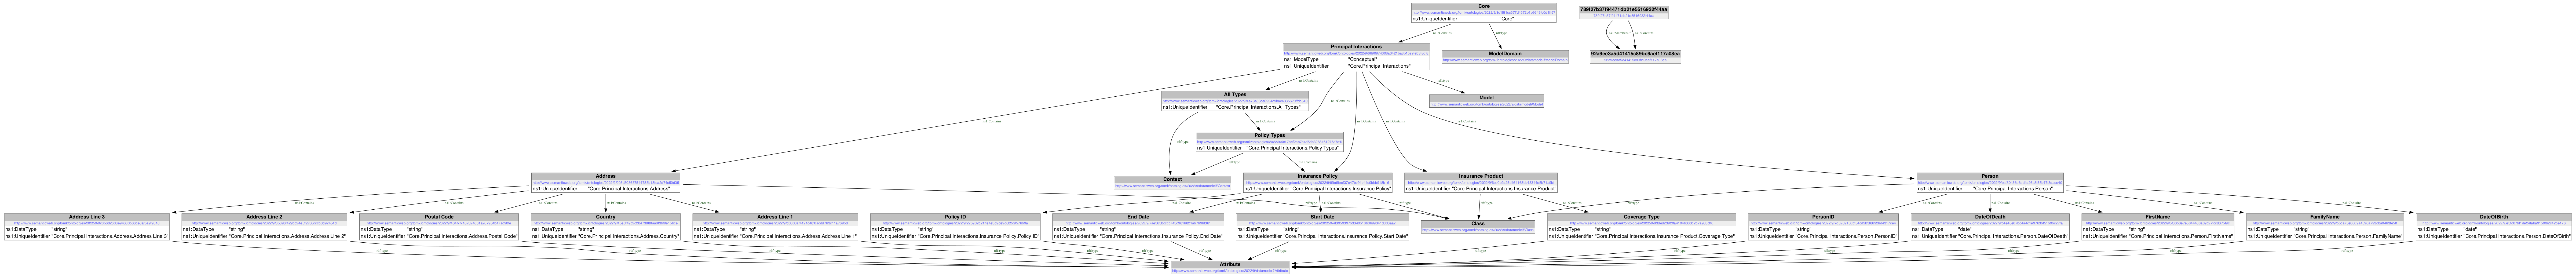

In [11]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    UNION
    {
        ?s a dm:BatchNode .
        ?s dm:Contains ?o .
        BIND (dm:Contains as ?p)
    }
    UNION
    {
        ?s a dm:BatchNode .
        BIND (dm:MemberOf as ?p)
        ?o ?p ?s .
    }
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(test.query(q)))

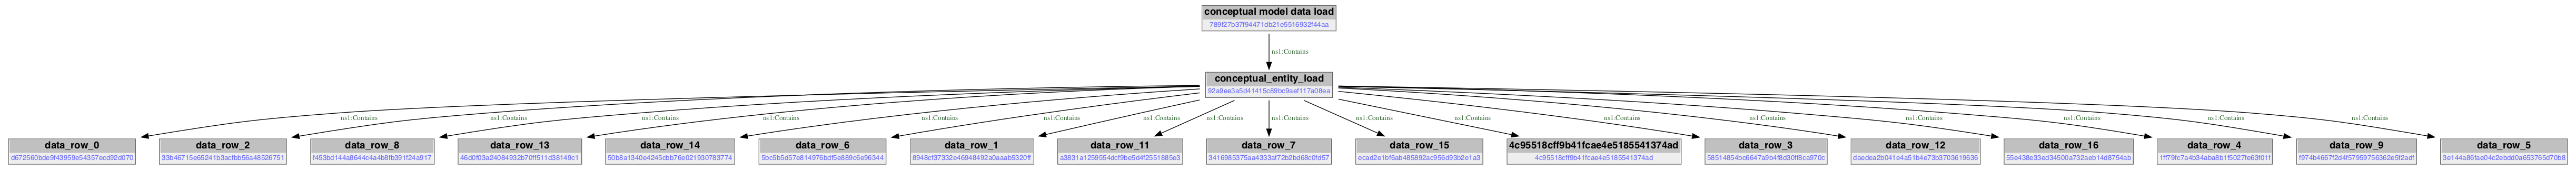

In [12]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (dm:Contains as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode}
        ?o ?m ?s .
    }
    UNION
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (rdfs:label as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode dm:RowNode}
        ?q ?m ?s .
        ?s ?p ?o .
    }
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(test.query(q)))

In [13]:
#batch_two

data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FirstName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FamilyName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfBirth", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfDeath", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 1", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 2", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line Three", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Postal Code", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Product", 
             "Attribute" : "Coverage Type", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Policy ID", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Start Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "End Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Context" : "Policy Types"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Context" : "All Types",
             "SubContext" : "Policy Types"},
             
            ]

pd.DataFrame(data_rows)

,Business Domain,Model,ModelType,Entity,Attribute,DataType,Context,SubContext
0,Core,Principal Interactions,Conceptual,Person,PersonID,string,NaN,NaN
1,Core,Principal Interactions,Conceptual,Person,FirstName,string,NaN,NaN
2,Core,Principal Interactions,Conceptual,Person,FamilyName,string,NaN,NaN
3,Core,Principal Interactions,Conceptual,Person,DateOfBirth,date,NaN,NaN
4,Core,Principal Interactions,Conceptual,Person,DateOfDeath,date,NaN,NaN
5,Core,Principal Interactions,Conceptual,Address,Address Line 1,string,NaN,NaN
6,Core,Principal Interactions,Conceptual,Address,Address Line 2,string,NaN,NaN
7,Core,Principal Interactions,Conceptual,Address,Address Line Three,string,NaN,NaN
8,Core,Principal Interactions,Conceptual,Address,Postal Code,string,NaN,NaN
9,Core,Principal Interactions,Conceptual,Address,Country,string,NaN,NaN


In [14]:
batch_manifest = { onto.EntityAttributeRecord : data_rows}
test = loader.load_data(onto, batch_manifest=batch_manifest, rdflib_graph=test, serial_key=serial_key)

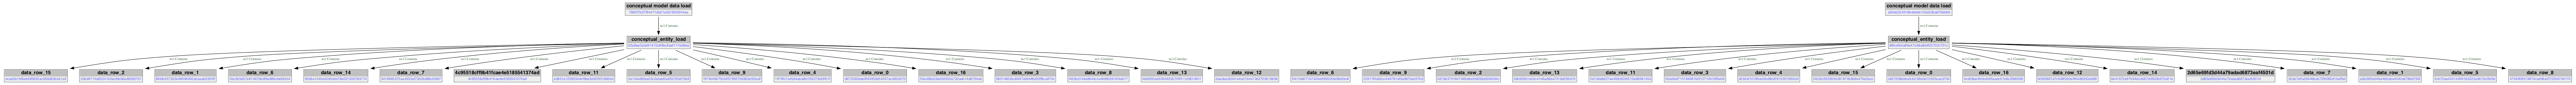

In [15]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (dm:Contains as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode}
        ?o ?m ?s .
    }
    UNION
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (rdfs:label as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode dm:RowNode}
        ?q ?m ?s .
        ?s ?p ?o .
    }
    
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(test.query(q)))

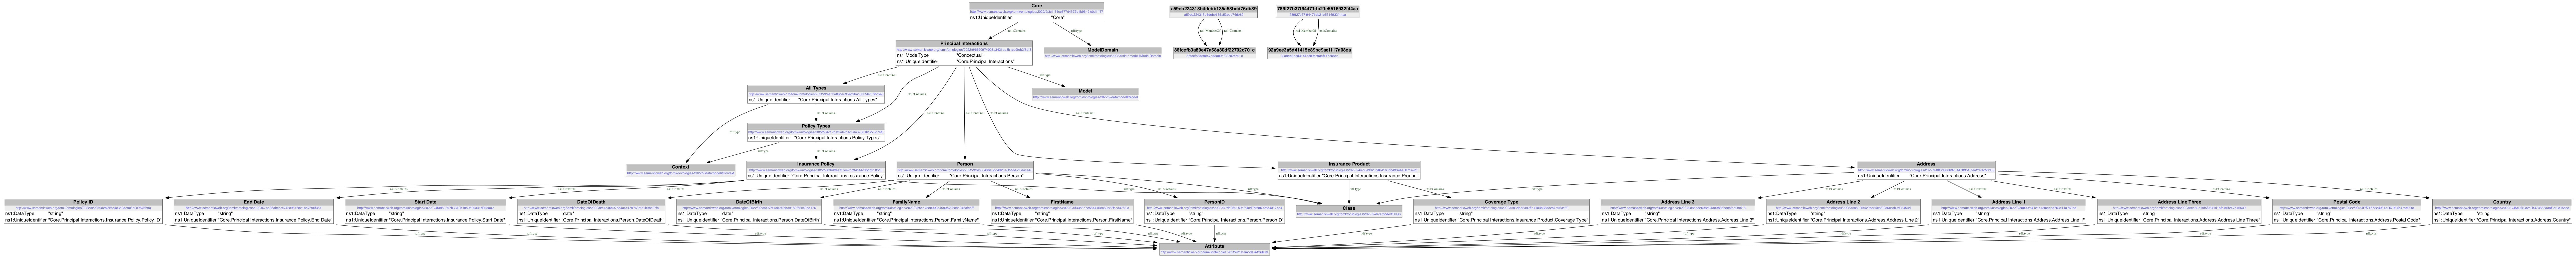

In [16]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    UNION
    {
        ?s a dm:BatchNode .
        ?s dm:Contains ?o .
        BIND (dm:Contains as ?p)
    }
    UNION
    {
        ?s a dm:BatchNode .
        BIND (dm:MemberOf as ?p)
        ?o ?p ?s .
    }
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(test.query(q)))

In [17]:
q = """
        SELECT distinct ?b ?j ?r ?f ?s ?p ?o ?sl ?ol
        
        WHERE
        
        {
        
            ?b a dm:BatchNode .
            ?b dm:Contains ?j .
            ?j dm:Contains ?r .
            ?r dm:Contains ?f .
            ?f dm:FactSubject ?s . 
            ?f dm:FactPredicate ?p .
            ?f dm:FactObject ?o.
            ?s dm:UniqueIdentifier ?sl .
            ?o dm:UniqueIdentifier ?ol .
            
            
            

        }


"""


#owlr.DeductiveClosure(onto).expand(row_g)
#visualize(t2rdflibg(row_g.query(q)))

df = pd.DataFrame(test.query(q), columns=["b","j","r","f","s","p","o", "sl", "ol"])

In [18]:
df['key'] = df.apply(lambda x : str(x['sl']) + "." + str(x["p"]).split("#")[1] + "." + str(x['ol']), axis=1)
#df.sort_values(by="key")[["j", "r", "s","p","o"]].values

In [19]:
# Reconciling an arbitrarily complex object - Look for rows where the count != 2
# The things being reconciled here are facts/triples - so it's 100% coverage
rec_df = df.pivot_table(index="key", columns=["b"], aggfunc=len,margins=True)["f"].fillna(0).iloc[0:-1]
# If the older side has zero contents, and the newer side contains content, then it's an add.
# Conversely, a delete is signified.
# Processing this 
rec_df[rec_df['All']!=2]

b,789f27b37f94471db21e5516932f44aa,a59eb224318b4debb135a53bdd76db89,All
key,,,
Core.Principal Interactions.Address.Contains.Core.Principal Interactions.Address.Address Line 3,1.0,0.0,1
Core.Principal Interactions.Address.Contains.Core.Principal Interactions.Address.Address Line Three,0.0,1.0,1


In [20]:
assert False

AssertionError: 

In [ ]:



triples =  []
catalog = {}

batch_header_URI, header_triples = loader.gen_batch_header(onto, onto.iri, "conceptual model data load")
triples.extend( header_triples )
job_header_URI, job_triples = loader.gen_job_header(onto, batch_header_URI, onto.iri, "conceptual_entity_load")
triples.extend( job_triples )
reify_triples=[]

for e, row in enumerate(data_rows):
    row_header, row_h_triples = loader.gen_row_header(onto, job_header_URI, onto.iri, f"data_row_{e}")
    for t in row_h_triples:
        if t not in triples:
            triples.append( t )
#    print(row)
    row_triples, catalog = loader.gen_content(onto, row_header, loader.remap(row, serial_key), entities, properties, data_properties, lineage_tree,catalog, namespace)
    
    dup_index=[]
    for t in row_triples:
        if t not in triples:
            triples.append( t )
            dup_index.append(True)
        else:
            dup_index.append(False)

    for i,individual in enumerate(row_triples):
        if dup_index[i]:
            reify_triples.extend(loader.reify_triple(onto, row_header, individual))

# Reify triples to the Row_Node:
print (len(triples), len(reify_triples))

triples.extend(reify_triples)
    

In [ ]:
global_graph = Graph()

In [ ]:
row_g = Graph()
row_g.parse ("datamodels_rdf.owl", format='xml')
dmns = Namespace(onto.base_iri)
row_g.bind('dm', dmns, override=True, replace=True)
row_g.bind('rdfs', RDFS)
namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}

view_g = Graph()


In [ ]:

triples = master_triples(row_g, triples)

for e,t in enumerate(triples):
    try:
        row_g.add(t)
    except AssertionError as err: 
        print(e, t)
        print(err)
    view_g.add(t)
    
print(len(view_g))
#visualize(view_g)

In [ ]:
# Find all items in the global graph that may already exist
# prior to performing an import of this batch's data
get_s_nodes="""
    SELECT ?s ?o
    WHERE
        {
        ?s dm:UniqueIdentifier ?o.
        }

    """

{v.value:k for k,v in list(row_g.query(get_s_nodes))}

In [ ]:
q =  """ SELECT ?s ?ls ?o ?lo
WHERE
{
    ?s dm:Contains ?o.
    ?o a dm:Context .
    ?s a dm:Context .
    ?s rdfs:label ?ls .
    ?o rdfs:label ?lo .
}"""

list(row_g.query(q))

In [ ]:
list(row_g.query(get_s_nodes))[0][0].toPython()

In [ ]:
print(row_g.serialize(format="xml").decode())

In [ ]:
#batch_two

data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FirstName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FamilyName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfBirth", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfDeath", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 1", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 2", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line Three", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Postal Code", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Product", 
             "Attribute" : "Coverage Type", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Policy ID", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Start Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "End Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Context" : "Policy Types"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Context" : "All Types",
             "SubContext" : "Policy Types"},
             
            ]

pd.DataFrame(data_rows)

In [ ]:
namespace = onto.base_iri


triples =  []
catalog = {}

batch_header_URI, header_triples = loader.gen_batch_header(onto, onto.iri, "conceptual model data load")
triples.extend( header_triples )
job_header_URI, job_triples = loader.gen_job_header(onto, batch_header_URI, onto.iri, "conceptual_entity_load")
triples.extend( job_triples )
reify_triples=[]

#for e, row in enumerate(data_rows):
#    row_header, row_h_triples = loader.gen_row_header(onto, job_header_URI, onto.iri, f"data_row_{e}")
#    triples.extend( row_h_triples )
#    print(row)
#    t, catalog = loader.gen_content(onto, row_header, loader.remap(row, serial_key), entities, properties, data_properties, lineage_tree,catalog, namespace)
#    triples.extend( t )
#    for individual in t:
#        
#        reify_triples.extend(loader.reify_triple(onto, row_header, individual))

    

    
        
for e, row in enumerate(data_rows):
    row_header, row_h_triples = loader.gen_row_header(onto, job_header_URI, onto.iri, f"data_row_{e}")
    for t in row_h_triples:
        if t not in triples:
            triples.append( t )
#    print(row)
    row_triples, catalog = loader.gen_content(onto, row_header, loader.remap(row, serial_key), entities, properties, data_properties, lineage_tree,catalog, namespace)

    
    dup_index=[]
    for t in row_triples:
        if t not in triples:
            triples.append( t )
            dup_index.append(True)
        else:
            dup_index.append(False)

    for i,individual in enumerate(row_triples):
        if dup_index[i]:
            reify_triples.extend(loader.reify_triple(onto, row_header, individual))

#    for t in row_triples:
#        if t not in triples:
#            triples.append( t )
#
#    for individual in row_triples:
#        
#        reify_triples.extend(loader.reify_triple(onto, row_header, individual))

        
        
        
# Reify triples to the Row_Node:
print (len(triples), len(reify_triples))

triples.extend(reify_triples)
    

In [ ]:
triples = master_triples(row_g, triples)
for e,t in enumerate(triples):
    try:
        row_g.add(t)
    except AssertionError as err: 
        print(e, t)
        print(err)
    view_g.add(t)
    
print(len(view_g))
#visualize(view_g)

In [ ]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (dm:Contains as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode}
        ?o ?m ?s .
    }
    UNION
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (rdfs:label as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode dm:RowNode}
        ?q ?m ?s .
        ?s ?p ?o .
    }
    
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(row_g.query(q)))

In [ ]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    UNION
    {
        ?s a dm:FactNode .
        ?s dm:Contains ?o .
        BIND (dm:Contains as ?p)
    }
    
    
}
"""

q = """
SELECT ?fact ?l ?r ?rl ?j ?jl ?b ?bl ?t
WHERE 

{

    {
        ?fact a dm:FactNode .
        OPTIONAL { ?fact rdfs:label ?l. }
        OPTIONAL { ?r dm:Contains ?fact; 
                      rdfs:label ?rl .
                   ?j dm:Contains ?r ;
                      rdfs:label ?jl .
                   ?b dm:Contains ?j;
                      dm:GeneratedOn ?t; 
                      rdfs:label ?bl .}
    }
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
#visualize(t2rdflibg(row_g.query(q)))

list(row_g.query(q))

In [ ]:
df['key'] = df.apply(lambda x : str(x['sl']) + "." + str(x["p"]).split("#")[1] + "." + str(x['ol']), axis=1)

In [ ]:
str(df["p"][0]).split("#")[1]#.rstrip()

In [ ]:
df.sort_values(by="key")[["j", "r", "s","p","o"]].values

In [ ]:
df.groupby("key").agg(len)

In [ ]:
master_triples(row_g, triples)